In [0]:
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
#from sklearn.utils.validation import train_test_split
import cv2
import numpy as np
from matplotlib.pyplot import imshow 

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


from keras.models import Sequential, Model
from keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adadelta
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model

# dataset mounting from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Each class is assigned to a specific number

In [0]:
classes = {'binocular' : 0, 'camera' : 1, 'ceiling_fan' : 2, 'chair' : 3, 'cup' : 4, 'headphone' : 5, 'lamp' : 6, 'scissors' : 7 , 'umbrella' : 8 , 'wrench' : 9}


#Exploring data and resizing every image 

In [3]:
path = '/content/drive/My Drive/home'
dataset_path = '/content/drive/My Drive/home/dataset'

class_labels = []
 
# features = []
# labels = []
count_of_images = []

X = np.ndarray((505, 300, 300, 3), dtype=np.uint8)
Y = []
c = 0
for i in os.listdir(dataset_path):
    a = dataset_path + "/" + i
    if not a.endswith(".ipynb_checkpoints"):
      for k in os.listdir(a):
          l = a + "/" + k
          img = cv2.imread(l)
          img1 = cv2.resize(img,(300,300))
          # features.append(img1)
          # labels.append(classes[i])
          X[c] = img1
          Y.insert(c, i)
          c += 1
      count_of_images.append(len(os.listdir(a)))                 
#print(count_of_images)
# print(features)
print(len(X))





505


# plotting graph (number of images for each class)

<BarContainer object of 10 artists>

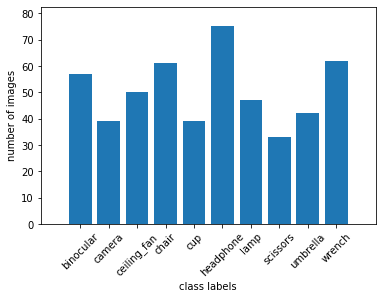

In [21]:
class_labels = list(classes.keys())
# features1 = np.stack(features,axis = 0).reshape(505,300*300*3)

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.xlabel('class labels')
plt.ylabel('number of images')

plt.margins(0.1)
plt.xticks(x, class_labels, rotation = 45)
plt.bar(class_labels, count_of_images)

cup


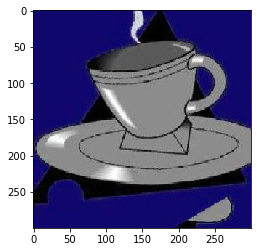

In [5]:
imshow(X[0])
print(Y[0])



In [6]:
label_encoder = LabelEncoder()
Y_integer_encoded = label_encoder.fit_transform(Y)
Y_integer_encoded

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [7]:
len(Y_integer_encoded)

505

In [8]:
Y_one_hot = to_categorical(Y_integer_encoded)
Y_one_hot


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
Y_one_hot[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
len(Y_one_hot)

505

In [11]:
X_normalized = X.astype(np.float64) / 255
X_normalized[0]

array([[[0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941],
        ...,
        [0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941]],

       [[0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941],
        ...,
        [0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941]],

       [[0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941],
        ...,
        [0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941],
        [0.05882353, 0.02745098, 0.42352941]],

       ...,

       [[0.06666667, 0.02352941, 0.42352941],
        [0.06666667, 0.02352941, 0.42352941],
        [0.06666667, 0

# Splitting data

In [0]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_normalized, Y_one_hot, test_size = 0.25, random_state = 42)


In [13]:
X_train.shape

(378, 300, 300, 3)

# checking whether the image and class name matched or not

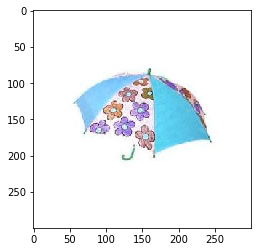

In [27]:
imshow(X_train[89])

In [0]:
def classLabel(val):
  for key, value in classes.items():
    if(value == val):
      return key

In [23]:
classLabel(np.argmax(Y_train[89]))

'umbrella'

In [24]:
Y_train.shape

(378, 10)

In [0]:
model_cnn = Sequential()
model_cnn.add(Conv2D(8, (3,3), activation='relu', input_shape=(300,300,3)))
model_cnn.add(Conv2D(16, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn.add(Conv2D(32, (3,3), activation='relu'))

model_cnn.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.summary()

In [0]:
model_cnn.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [28]:
model_cnn.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_validation,Y_validation))

Train on 378 samples, validate on 127 samples
Epoch 1/10
378/378 [==============================] - 46s 122ms/step - loss: 6.5369 - acc: 0.1349 - val_loss: 6.2979 - val_acc: 0.0709
Epoch 2/10
378/378 [==============================] - 46s 121ms/step - loss: 3.6406 - acc: 0.1349 - val_loss: 2.5127 - val_acc: 0.0630
Epoch 3/10
378/378 [==============================] - 46s 122ms/step - loss: 2.1140 - acc: 0.2302 - val_loss: 2.1875 - val_acc: 0.1890
Epoch 4/10
378/378 [==============================] - 46s 121ms/step - loss: 1.8044 - acc: 0.4206 - val_loss: 2.1673 - val_acc: 0.2520
Epoch 5/10
378/378 [==============================] - 46s 122ms/step - loss: 1.5046 - acc: 0.6164 - val_loss: 1.9837 - val_acc: 0.3622
Epoch 6/10
378/378 [==============================] - 46s 122ms/step - loss: 1.1669 - acc: 0.6931 - val_loss: 1.8408 - val_acc: 0.4016
Epoch 7/10
378/378 [==============================] - 46s 123ms/step - loss: 0.8190 - acc: 0.7513 - val_loss: 1.8630 - val_acc: 0.4646
Epoch 8/1

In [0]:
l = "/content/image_0001.jpg"
image = cv2.imread(l)
resized_image = cv2.resize(image,(300,300))
reshape_image = resized_image.reshape(1,300, 300, 3)
prediction = model_cnn.predict(reshape_image)

In [33]:
print(classLabel(np.argmax(prediction)))

camera
